In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\Christian\\Anaconda3\\envs\\bwmd\\Lib\\site-packages')

In [2]:
from bwmd.compressor import Compressor, load_vectors
from bwmd.distance import convert_vectors_to_dict, build_partitions_lookup_tables, BWMD

In [3]:
PATH = 'cc.de.300.vec'
ORIGINAL_DIM = 300
REDUCED_DIM = 512
COMPRESSION = 'bool_'

In [4]:
# Load real-valued vectors.
vectors = load_vectors(
    path=PATH,
    size=100_000,
    expected_dimensions=ORIGINAL_DIM,
    skip_first_line=True,
)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 12041.41it/s]


In [5]:
# Instantiate compressor.
compressor = Compressor(
    original_dimensions=ORIGINAL_DIM,
    reduced_dimensions=REDUCED_DIM,
    compression=COMPRESSION,
)

Epoch:  0		Loss:  4170.484
Epoch:  1		Loss:  2292.445
Epoch:  2		Loss:  1320.237
Epoch:  3		Loss:  818.222
Epoch:  4		Loss:  573.002
Epoch:  5		Loss:  466.732
Epoch:  6		Loss:  436.229
Epoch:  7		Loss:  435.429
Epoch:  8		Loss:  435.145
Epoch:  9		Loss:  434.322


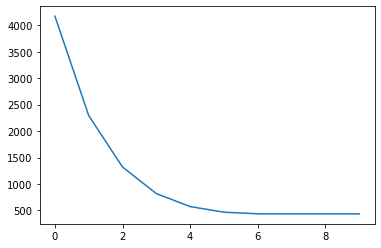

In [6]:
# Fit compressor to the data.
compressor.fit(vectors, epochs=10)

In [7]:
# Transform and save original vectors.
output_dir = compressor.transform(PATH, ORIGINAL_DIM, n_vectors=30_000)

100%|█████████████████████████████████████████████████████████████████████████| 30000/30000 [00:02<00:00, 10926.46it/s]


Encoding vectors ...
Exporting compressed vectors ...
Vectors of size 896 bits reduced to 4108 bits.


In [8]:
# Create a set of lookup tables from the exported model.
vectors, words = load_vectors(
    path=f'{output_dir}\\vectors.txtc',
    size=20_000,
    expected_dimensions=REDUCED_DIM,
    expected_dtype=COMPRESSION,
    get_words=True,
)
# Convert to dict.
vectors = convert_vectors_to_dict(vectors, words)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 6884.51it/s]


In [9]:
# Build and save the lookup tables.
model = build_partitions_lookup_tables(
    vectors=vectors,
    I=11,
    real_value_path=PATH,
    vector_size=REDUCED_DIM,
)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Making 100 partitionings of size 2048


 10%|████████                                                                         | 10/100 [00:00<00:01, 86.72it/s]

Time to compute partitionings:  65.674
Loading partitionings ...


  0%|▎                                                                             | 77/20000 [00:00<00:28, 706.17it/s]

Organizing associated words for all tokens ...


  3%|██▍                                                                         | 653/20000 [00:00<00:03, 6130.95it/s]

Loading raw vectors ...


  0%|                                                                              | 15/19999 [00:00<02:27, 135.31it/s]

Loading wordlists ...


  0%|▏                                                                             | 35/19999 [00:00<00:57, 346.54it/s]

Computing cosine distances for each token ...


100%|███████████████████████████████████████████████████████████████████████████| 19999/19999 [01:18<00:00, 254.87it/s]


Time to compute lookup tables:  236.524


In [10]:
# Instantiate bwmd object.
bwmd = BWMD(
    model_path=model,
    dim=REDUCED_DIM,
    with_syntax=False,
    full_cache=True
)

  0%|                                                                              | 14/19986 [00:00<02:31, 132.08it/s]

Loading all lookup tables ...


100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 7293.02it/s]


In [11]:
# Instantiate corpus of texts.
corpus = [
    "Obama spricht mit den Medien in Illinois",
    "Der Präsident begrüßt die Presse in Chicago",
    "Dieser Satz hat nichts zu tun"
]
# Distance measures require docs as lists of strings.
corpus = [doc.split() for doc in corpus]

In [12]:
# Get pairwise distance.
bwmd.pairwise(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 272.71it/s]


array([[0.        , 0.25846354, 0.28971354],
       [0.25846354, 0.        , 0.28173828],
       [0.28971354, 0.28173828, 0.08672225]])